In [19]:
from mountain import Mountain_one, Mountain_two

import numpy as np
from typing import Tuple
import os
import matplotlib.pyplot as plt 

In [20]:
def policy_evaluation(env, policy, theta=1e-6, gamma=1.0, order="left-right", max_iters=150):
    """
    Evaluates a policy with different state ordering, ensuring at least 'min_iters' iterations.
    
    Args:
        env -- Mountain environment
        policy -- Dictionary mapping states to actions
        theta -- Convergence threshold
        gamma -- Discount factor
        order -- "left-right" or "right-left"
        max_iters -- Maximum iterations for evaluation    
    Returns:
        V -- Dictionary of state values
        V_matrix -- Matrix representation of state values
    """
    V = { (i, j): 0 for i in range(31) for j in range(100) }
    states = sorted(V.keys(), key=lambda x: x[1]) if order == "left-right" else sorted(V.keys(), key=lambda x: -x[1])
    
    for iteration in range(max_iters):
        delta = 0
        for state in states:
            action = policy[state]
            next_state, reward = env.next_state(state, action), env.get_reward(state, action)
            new_value = reward + gamma * V[next_state]
            delta = max(delta, abs(new_value - V[state]))
            V[state] = new_value
        
        # Force at least 'min_iters' iterations before checking convergence
        if delta < theta:
            print(f"Converged at iteration {iteration}, Order: {order}")
            break

        print(f"Iteration {iteration}, Order: {order}, Value at (15,0): {V[(15,0)]}")

    # Convert V to matrix representation
    V_matrix = np.zeros((31, 100))
    for (i, j), value in V.items():
        V_matrix[i, j] = value

    return V, V_matrix


In [21]:
def straight_forward_policy(state):
    return "forward"

In [22]:
env = Mountain_one()
policy = { (i, j): straight_forward_policy((i, j)) for i in range(31) for j in range(100) }
V_pi_str,V_pi_str_matrix = policy_evaluation(env, policy)

print("Value function for π_str computed.")

Iteration 0, Order: left-right, Value at (15,0): -0.31764707
Iteration 1, Order: left-right, Value at (15,0): -0.72156864
Iteration 2, Order: left-right, Value at (15,0): -1.25098044
Iteration 3, Order: left-right, Value at (15,0): -1.9058823400000002
Iteration 4, Order: left-right, Value at (15,0): -2.6745098
Iteration 5, Order: left-right, Value at (15,0): -3.58039216
Iteration 6, Order: left-right, Value at (15,0): -4.50980386
Iteration 7, Order: left-right, Value at (15,0): -5.42745096
Iteration 8, Order: left-right, Value at (15,0): -6.25490196
Iteration 9, Order: left-right, Value at (15,0): -6.843137259999999
Iteration 10, Order: left-right, Value at (15,0): -7.329411799999999
Iteration 11, Order: left-right, Value at (15,0): -7.756862799999999
Iteration 12, Order: left-right, Value at (15,0): -8.243137339999999
Iteration 13, Order: left-right, Value at (15,0): -8.81568639
Iteration 14, Order: left-right, Value at (15,0): -9.43529429
Iteration 15, Order: left-right, Value at (15

In [23]:
# Compare values
V_left_right,_ = policy_evaluation(env, policy, order="left-right")
print(f"Final Value at (15,0) - Left-to-Right: {V_left_right[(15,0)]}")

Iteration 0, Order: left-right, Value at (15,0): -0.31764707
Iteration 1, Order: left-right, Value at (15,0): -0.72156864
Iteration 2, Order: left-right, Value at (15,0): -1.25098044
Iteration 3, Order: left-right, Value at (15,0): -1.9058823400000002
Iteration 4, Order: left-right, Value at (15,0): -2.6745098
Iteration 5, Order: left-right, Value at (15,0): -3.58039216
Iteration 6, Order: left-right, Value at (15,0): -4.50980386
Iteration 7, Order: left-right, Value at (15,0): -5.42745096
Iteration 8, Order: left-right, Value at (15,0): -6.25490196
Iteration 9, Order: left-right, Value at (15,0): -6.843137259999999
Iteration 10, Order: left-right, Value at (15,0): -7.329411799999999
Iteration 11, Order: left-right, Value at (15,0): -7.756862799999999
Iteration 12, Order: left-right, Value at (15,0): -8.243137339999999
Iteration 13, Order: left-right, Value at (15,0): -8.81568639
Iteration 14, Order: left-right, Value at (15,0): -9.43529429
Iteration 15, Order: left-right, Value at (15

In [24]:

V_right_left,_ = policy_evaluation(env, policy, order="right-left")
print(f"Final Value at (15,0) - Right-to-Left: {V_right_left[(15,0)]}")

Iteration 0, Order: right-left, Value at (15,0): -57.80784459
Converged at iteration 1, Order: right-left
Final Value at (15,0) - Right-to-Left: -57.80784459


## Consider the two polices evaluation in run with the different ordering of states. Did you learn something different between them?
The two value functions are the same, but the order in which the states are evaluated does affect the number of iterations required to converge. For the left to right, the policy converged after 98 iterations, while from right only required 10 iterations


In [25]:
def policy_iteration(env, gamma=1.0):
    """
    Runs the policy iteration algorithm to find an optimal policy.
    """
    policy = { (i, j): "forward" for i in range(31) for j in range(100) }  # Initialize random policy
    V = { (i, j): 0 for i in range(31) for j in range(100) }

    while True:
        # Policy Evaluation
        V,_ = policy_evaluation(env, policy, gamma=gamma)
        
        # Policy Improvement
        policy_stable = True
        for state in V:
            best_action = None
            best_value = float('-inf')

            for action in env.actions:
                next_state, reward = env.next_state(state, action), env.get_reward(state, action)
                value = reward + gamma * V[next_state]

                if value > best_value:
                    best_value = value
                    best_action = action

            if best_action != policy[state]:  # If policy changes, keep iterating
                policy_stable = False
                policy[state] = best_action
        
        if policy_stable:
            break

    return policy, V

In [26]:
env = Mountain_one()
optimal_policy, V_opt = policy_iteration(env)

print("Optimal policy computed using policy iteration.")


Iteration 0, Order: left-right, Value at (15,0): -0.31764707
Iteration 1, Order: left-right, Value at (15,0): -0.72156864
Iteration 2, Order: left-right, Value at (15,0): -1.25098044
Iteration 3, Order: left-right, Value at (15,0): -1.9058823400000002
Iteration 4, Order: left-right, Value at (15,0): -2.6745098
Iteration 5, Order: left-right, Value at (15,0): -3.58039216
Iteration 6, Order: left-right, Value at (15,0): -4.50980386
Iteration 7, Order: left-right, Value at (15,0): -5.42745096
Iteration 8, Order: left-right, Value at (15,0): -6.25490196
Iteration 9, Order: left-right, Value at (15,0): -6.843137259999999
Iteration 10, Order: left-right, Value at (15,0): -7.329411799999999
Iteration 11, Order: left-right, Value at (15,0): -7.756862799999999
Iteration 12, Order: left-right, Value at (15,0): -8.243137339999999
Iteration 13, Order: left-right, Value at (15,0): -8.81568639
Iteration 14, Order: left-right, Value at (15,0): -9.43529429
Iteration 15, Order: left-right, Value at (15

In [27]:
def value_iteration(env, theta=1e-6, gamma=1.0):
    """
    Computes the optimal policy using Value Iteration.
    """
    V = { (i, j): 0 for i in range(31) for j in range(100) }

    while True:
        delta = 0
        for state in V:
            best_value = float('-inf')

            for action in env.actions:
                next_state, reward = env.next_state(state, action), env.get_reward(state, action)
                value = reward + gamma * V[next_state]

                best_value = max(best_value, value)

            delta = max(delta, abs(best_value - V[state]))
            V[state] = best_value
        
        if delta < theta:
            break  # Convergence check

    # Extract optimal policy
    optimal_policy = {}
    for state in V:
        best_action = max(env.actions, key=lambda a: env.get_reward(state, a) + gamma * V[env.next_state(state, a)])
        optimal_policy[state] = best_action

    return optimal_policy, V

In [28]:
env = Mountain_one()
optimal_policy_vi, V_vi = value_iteration(env)

print("Optimal policy computed using value iteration.")

Optimal policy computed using value iteration.


In [29]:
def plot_trajectory(env, policy, start_state):
    state = start_state
    trajectory = [state]
    while state[1] < 99:
        action = policy[state]
        state = env.next_state(state, action)
        trajectory.append(state)
    x_vals, y_vals = zip(*trajectory)
    
    # Plot terrain
    plt.figure(figsize=(10, 5))
    plt.imshow(env.get_map(), cmap='terrain', origin='upper')
    plt.colorbar(label='Roughness')
    
    # Plot trajectory on top
    plt.plot(y_vals, x_vals, marker='o', linestyle='-', color='red', label='Trajectory')
    plt.xlabel("Column (x)")
    plt.ylabel("Row (y)")
    plt.title("Robot Trajectory on Terrain")
    plt.legend()
    plt.show()


starting from (15,0)


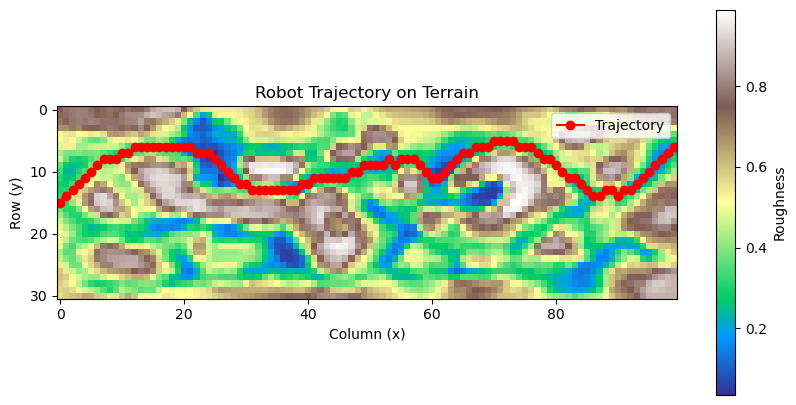

starting from (3,0)


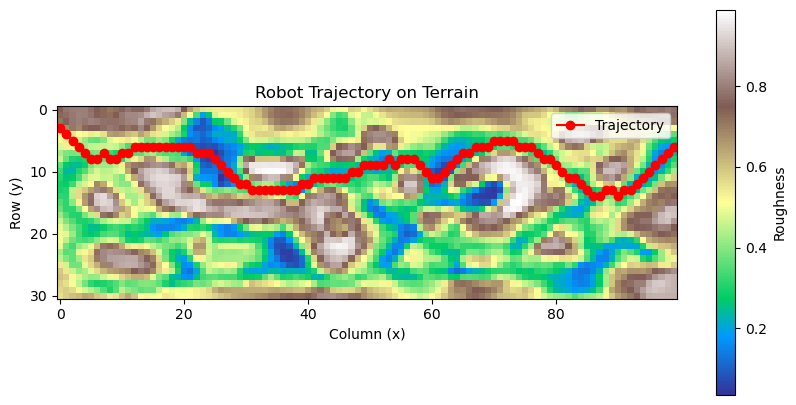

In [30]:
env = Mountain_one()
print("starting from (15,0)")
plot_trajectory(env, optimal_policy, (15, 0))  # Start from (15,0)
print("starting from (3,0)")
plot_trajectory(env, optimal_policy, (3, 0))   # Start from (3,0)

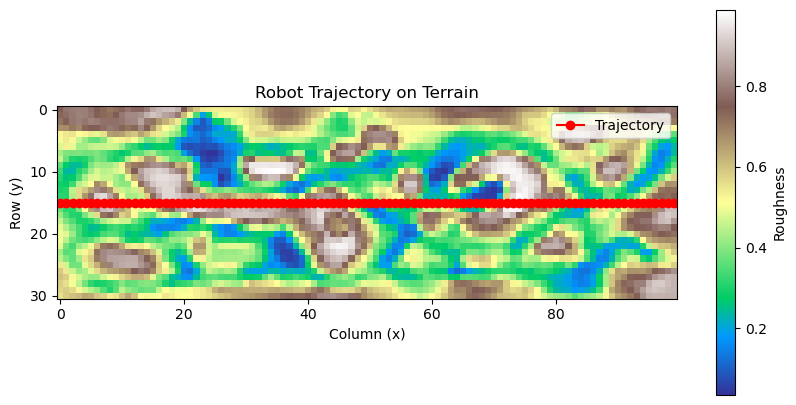

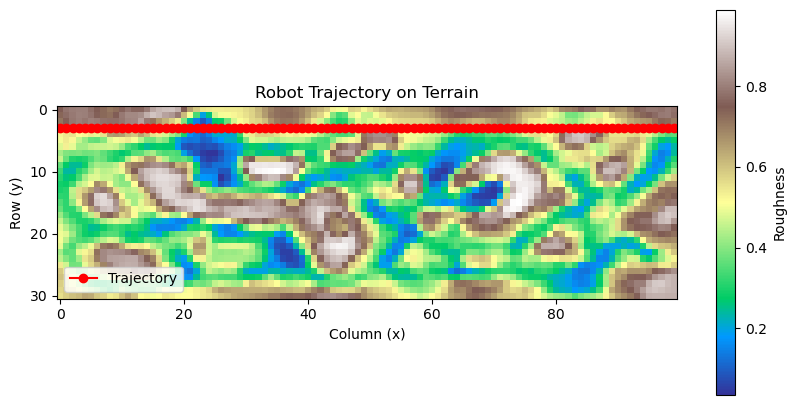

In [31]:
env = Mountain_one()
policy = { (i, j): straight_forward_policy((i, j)) for i in range(31) for j in range(100) }

plot_trajectory(env, policy, (15, 0))  # Start from (15,0)
plot_trajectory(env, policy, (3, 0))   # Start from (3,0)


# best start row

In [32]:
#iterate the different rows, 

def find_best_row(env,policy):

    num_rows = np.shape(env.get_map())[0]
    best_row = None
    best_value = float('-inf')
    val,_ = policy_evaluation(env, policy, order="left-right")
    for row in range(num_rows):
        v =  val[(row,0)] 
        if v > best_value:
            best_value = v
            best_row = row
    return best_row, best_value

env = Mountain_one()


Iteration 0, Order: left-right, Value at (15,0): -0.31764707
Iteration 1, Order: left-right, Value at (15,0): -0.72156864
Iteration 2, Order: left-right, Value at (15,0): -1.25098044
Iteration 3, Order: left-right, Value at (15,0): -1.9058823400000002
Iteration 4, Order: left-right, Value at (15,0): -2.6745098
Iteration 5, Order: left-right, Value at (15,0): -3.58039216
Iteration 6, Order: left-right, Value at (15,0): -4.50980386
Iteration 7, Order: left-right, Value at (15,0): -5.42745096
Iteration 8, Order: left-right, Value at (15,0): -6.25490196
Iteration 9, Order: left-right, Value at (15,0): -6.843137259999999
Iteration 10, Order: left-right, Value at (15,0): -7.329411799999999
Iteration 11, Order: left-right, Value at (15,0): -7.756862799999999
Iteration 12, Order: left-right, Value at (15,0): -8.243137339999999
Iteration 13, Order: left-right, Value at (15,0): -8.81568639
Iteration 14, Order: left-right, Value at (15,0): -9.43529429
Iteration 15, Order: left-right, Value at (15

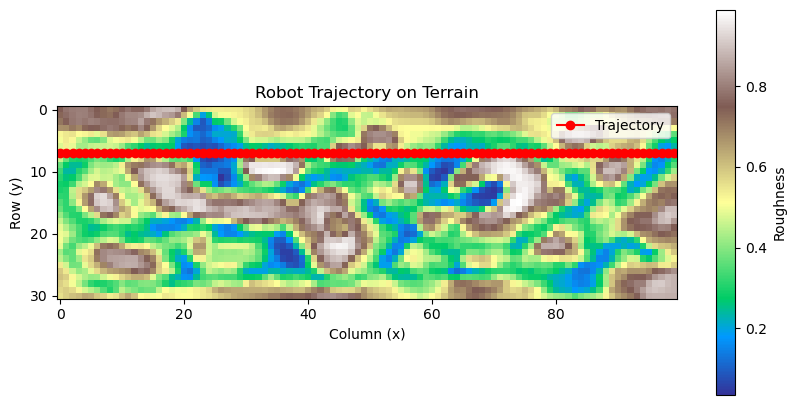

In [33]:
policy = { (i, j): straight_forward_policy((i, j)) for i in range(31) for j in range(100) }
env = Mountain_one()

row, val = find_best_row(env, policy)
plot_trajectory(env, policy, (row, 0))  # Start from best row

In [34]:
print(f"Best row: {row}, Value: {val}")

Best row: 7, Value: -35.72156986299999


Iteration 0, Order: left-right, Value at (15,0): -0.3137255
Iteration 1, Order: left-right, Value at (15,0): -0.76862746
Iteration 2, Order: left-right, Value at (15,0): -1.2117647200000001
Iteration 3, Order: left-right, Value at (15,0): -1.68627452
Iteration 4, Order: left-right, Value at (15,0): -2.16470592
Iteration 5, Order: left-right, Value at (15,0): -2.6470588599999996
Iteration 6, Order: left-right, Value at (15,0): -3.2823529999999996
Iteration 7, Order: left-right, Value at (15,0): -3.9529412499999994
Iteration 8, Order: left-right, Value at (15,0): -4.38039225
Iteration 9, Order: left-right, Value at (15,0): -4.77647069
Iteration 10, Order: left-right, Value at (15,0): -5.411764830000001
Iteration 11, Order: left-right, Value at (15,0): -6.04705897
Iteration 12, Order: left-right, Value at (15,0): -6.764706070000001
Iteration 13, Order: left-right, Value at (15,0): -7.658823770000001
Iteration 14, Order: left-right, Value at (15,0): -8.56862767
Iteration 15, Order: left-ri

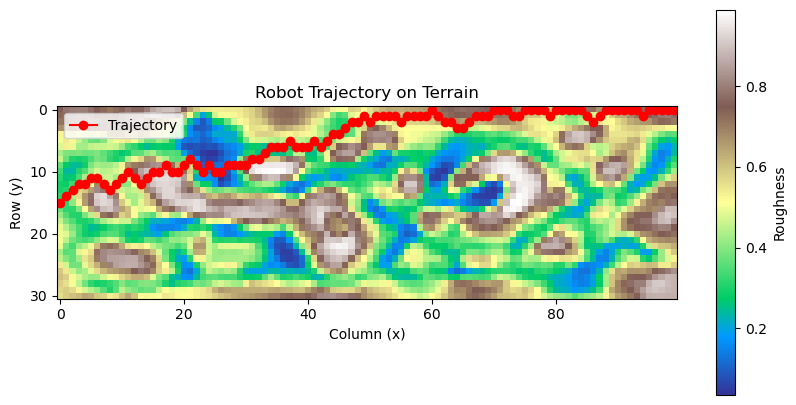

In [35]:
#Random policy
policy = { (i, j): np.random.choice(env.actions) for i in range(31) for j in range(100) }
env = Mountain_one()
#Check the policy evaluation
v_pi_rnd, _ = policy_evaluation(env, policy, order="left-right")
#plot the trajectory
plot_trajectory(env, policy, (15, 0))  # Start from (15,0)

In [36]:
#v_pi_rnd (15,0) V_pi_str (15,0) ,(3,0)
print(f"Value at (15,0) - Random Policy: {v_pi_rnd[(15,0)]}")
print(f"Value at (15,0) - Straight-Forward Policy: {V_pi_str[(15,0)]}")
print(f"Value at (3,0) - Straight-Forward Policy: {V_pi_str[(3,0)]}")

Value at (15,0) - Random Policy: -54.10588352999998
Value at (15,0) - Straight-Forward Policy: -57.80784459
Value at (3,0) - Straight-Forward Policy: -52.796080069999995
